# Understanding Pandas Series and DataFrames - Lab

# Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Practice

## Objectives
You will be able to:
* Understand and explain what Pandas Series and DataFrames are and how they differ from dictionaries and lists
* Create Series & DataFrames from dictionaries and lists
* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

# Rename all the columns to lower case

In [3]:
names = []
names_lower = []
[names.append(column[0]) for column in df.iteritems()]
[names_lower.append(name.lower()) for name in names]
names_cols = dict(zip(names,names_lower))
df = df.rename(columns=names_cols)
df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Change the Index to be the Line Names

In [4]:
df = df.set_index('linename')
df.head()

,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Painstakingly change the index back

In [5]:
df = df.reset_index()
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order.

In [6]:
stations = df.groupby('station')['linename'].nunique()

num_lines = pd.DataFrame(stations)
num_lines = num_lines.sort_values('linename',ascending=False)
num_lines.head()

,linename
station,
86 ST,4
23 ST,4
125 ST,4
103 ST,3
50 ST,3


## Write a function to clean a column name.

In [7]:
def clean(col_name):
    cleaned = col_name.strip()#Your code here; whatever you want to do to col_name. Hint: think back to str methods.
    return cleaned

In [8]:
#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [9]:
#Checking the output, we can see the results.
df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits'],
      dtype='object')

## Compare subway traffic by day of the week. Display this as a graph.

In [15]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline
#convert dates to weekdays
#pd.to_datetime(df.date).dt.day_name().head()
#group by linename
max_entries = df.groupby('linename')['entries'].max()
max_lines = [l for l in max_entries]
#max by linename
weekdays_df = df.copy()
weekdays_df['date'] = pd.to_datetime(df.loc[:,'date']).dt.day_name()
weekdays_entries = weekdays_df.groupby('date')['entries'].max()
weekdays_entries

date
Friday       2129763109
Monday       2129769332
Saturday     2129770911
Sunday       2129770026
Thursday     2129764684
Tuesday      2129767864
Wednesday    2129766306
Name: entries, dtype: int64

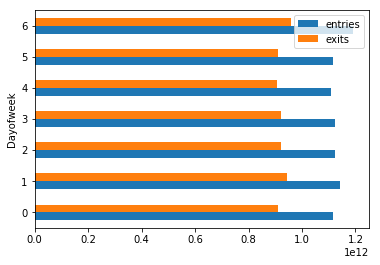

In [15]:
df.date = pd.to_datetime(df.date)
df['Dayofweek'] = df.date.dt.dayofweek
grouped = df.groupby('Dayofweek').sum()
grouped.plot(kind='barh')

## Is there more subway traffic on a weekend or a weekday?    Be specific in comparing magnitudes.

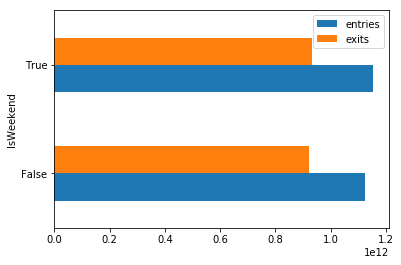

In [16]:
#Your code here
grouped = grouped.reset_index()
grouped['IsWeekend'] = grouped.Dayofweek.map({0:False,1:False,2:False,3:False,4:False,5:True,6:True})
wkend = grouped.groupby('IsWeekend').mean()
wkend[['entries', 'exits']].plot(kind='barh')

# Drop a couple of columns

In [ ]:
# Your code here